In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score, f1_score
import shap
shap.initjs()

Извлечение было произведено Барри Беккером из базы данных переписи 1994 года

Задача прогнозирования - определить, зарабатывает ли человек более 50 тыс. год

Информация об атрибутах:

Список атрибутов:

  + age: continuous.
  + workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
  + fnlwgt: continuous.
  + education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
  + education-num: continuous.
  + marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
  + occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
  + relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
  + race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
  + sex: Female, Male.
  + capital-gain: continuous.
  + capital-loss: continuous.
  + hours-per-week: continuous.
  + native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [2]:

col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
             'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'class']
df = pd.read_csv("data_set.csv", header=None, names=col_names)
df.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [3]:
df['class'] = np.where(df['class'] == " <=50K", 0, 1)
df['class'].value_counts()

0    24720
1     7841
Name: class, dtype: int64

In [4]:
cat_col_names = ['workclass', 'education', 'marital-status', 'occupation',
             'relationship', 'race', 'sex', 'native-country']

df = pd.get_dummies(df, columns= cat_col_names)
target = df.pop('class')
df['class'] = target
df

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,class
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32557,40,154374,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
32558,58,151910,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32559,22,201490,9,0,0,20,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [5]:
x_data = df.iloc[:,:-1]
y_data = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=7)

In [6]:
model = xgb.XGBRegressor()

model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_predict

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


array([-0.02453369,  0.49423367, -0.02296879, ..., -0.00564569,
        0.01765951,  0.42029762], dtype=float32)

In [7]:
explainer = shap.TreeExplainer(model)


In [8]:
shap_values = explainer.shap_values(X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


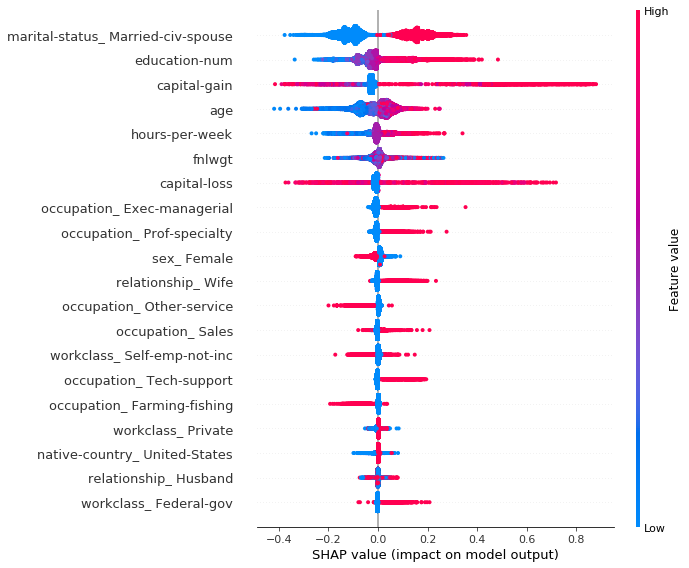

In [10]:
shap.summary_plot(shap_values, X_train)

Можно сделать следующие выводы:
    
    Больше 50к$ в то время зарабатывали в основном, взрослые, женатые мужчины, которые много занимались своим образованием и много работали.
    Величина потерянного капитала не сильно влияла на заработок людей.

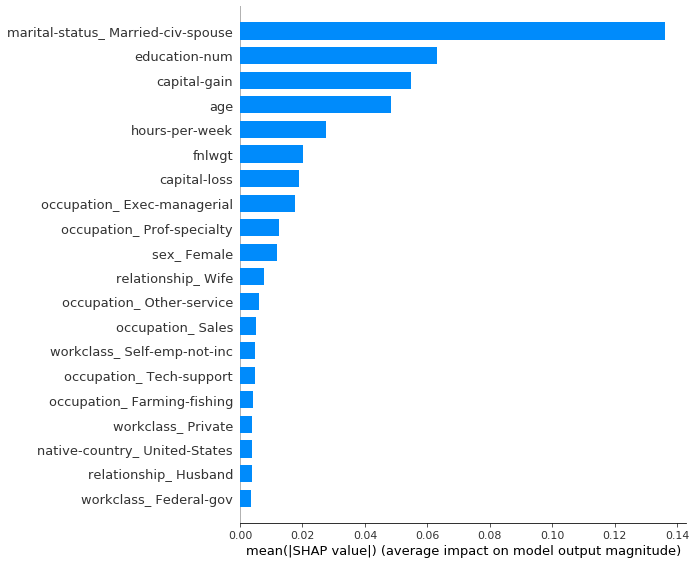

In [11]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

Интересно, что больше всего на результат влияло значение признака Женат, замужем. 

In [12]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

По этому графику видно то же самое, чем старше человек и чем больше он работает в неделю, и он женат, тем больше у него шанс быть в числе людей зарабатывающих больше 50к$ 